In [12]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#function to create and print the confusion matrix and the precision recall and F1 scores
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Extinct','Survived']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Accuracy={0:0.3f}'.format(accuracy))
    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

#function to create the precision- recall curve
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

#function to create the ROC cureve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
def plot_aucroc(classifier):
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [14]:
df = pd.read_csv("modified_dataset.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True)
df

,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,survival_status,lithology_carbonate,lithology_mixed,lithology_others,...,life_mode_semi-infaunal,motility_mobile,motility_stationary,feeding_mode_carnivore,feeding_mode_chemosymbiotic,feeding_mode_deposit feeder,feeding_mode_photosymbiotic,feeding_mode_suspension feeder,shell_minerology_aragonite,shell_minerology_low Mg calcite
0,0.0,0.5,0.166667,0.000000,0.002062,0.466741,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,0.0,0.5,0.500000,0.214286,0.018557,0.874605,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0.0,0.5,0.000000,0.000000,0.000000,0.570972,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.3,0.5,0.666667,0.214286,0.065979,0.041790,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.2,0.5,0.166667,0.357143,0.125773,0.751406,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.3,0.0,0.166667,0.000000,0.035052,0.285040,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
291,0.0,0.5,0.000000,0.000000,0.008247,0.474430,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
292,0.2,0.5,0.333333,0.071429,0.010309,0.726437,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
293,0.4,0.0,0.500000,0.071429,0.028866,0.547645,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
X = df.drop("survival_status", axis=1)
y = df.survival_status

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

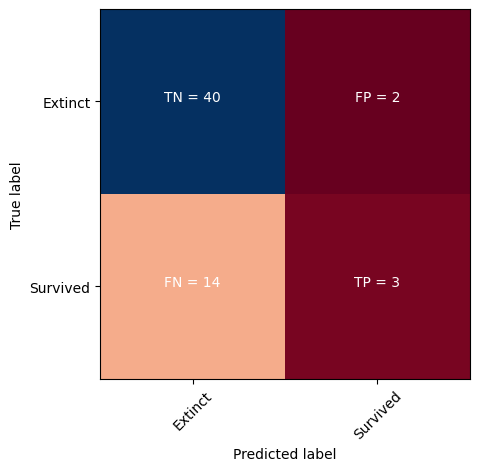

Accuracy=0.729
Recall=0.176 
Precision=0.600
F1=0.273
Average precision-recall score: 0.696


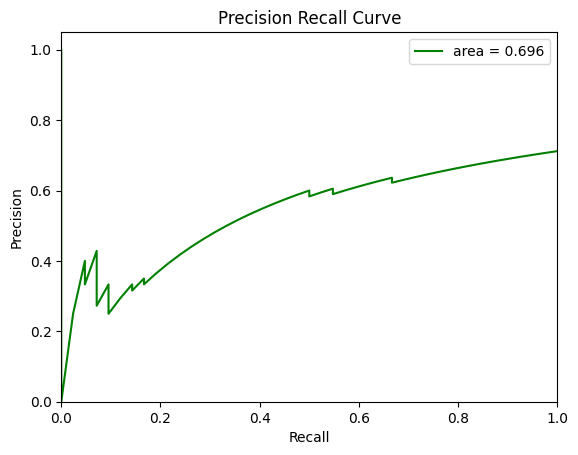

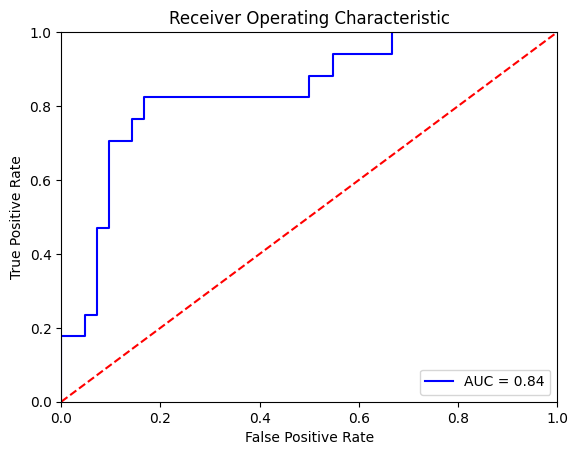

In [17]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

#Make predictions
y_pred = lrc.predict(X_test)
try:
    scores = lrc.decision_function(X_test)
except:
    scores = lrc.predict_proba(X_test)[:,1]

#Make plots
plot_cm(lrc, y_pred)
plot_aucprc(lrc, scores)
plot_aucroc(lrc)

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 27)

Classification of SMOTE-resampled dataset with Logistic Regression


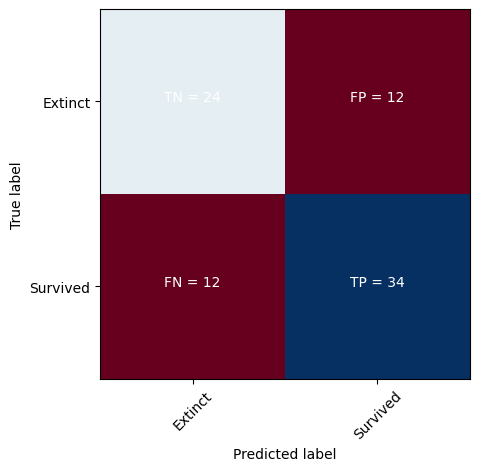

Accuracy=0.707
Recall=0.739 
Precision=0.739
F1=0.739
Average precision-recall score: 0.810


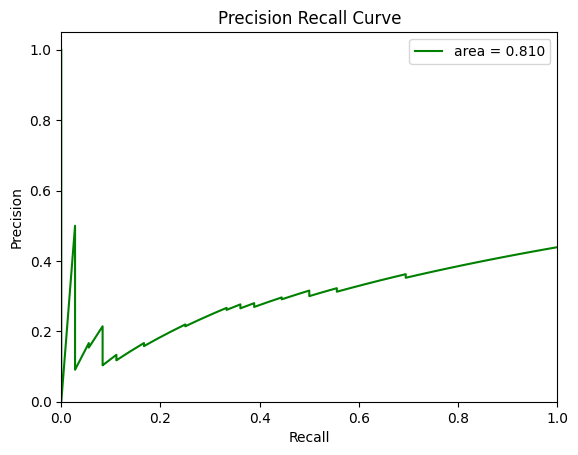

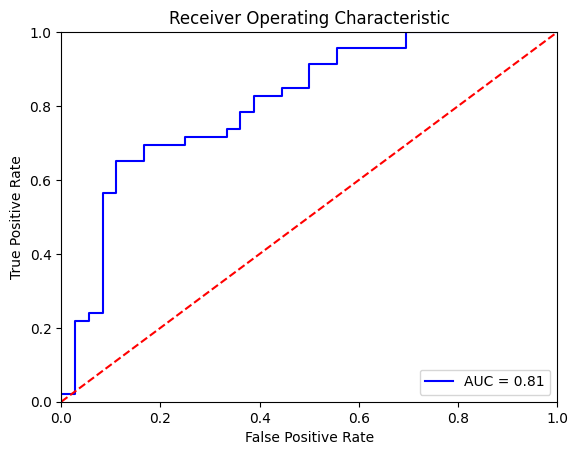

In [19]:
lrc.fit(X_train, y_train)
print('Classification of SMOTE-resampled dataset with Logistic Regression')
from sklearn.ensemble import RandomForestClassifier
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

#Make predictions
y_pred = lrc.predict(X_test)
try:
    scores = lrc.decision_function(X_test)
except:
    scores = lrc.predict_proba(X_test)[:,1]

#Make plots
plot_cm(lrc, y_pred)
plot_aucprc(lrc, scores)
plot_aucroc(lrc)